<h1><center>Introduction and Reference</center></h1>
Use 'Ctrl+f' to search through this document.

## If an import fails.

Open the jupyter homepage. On the right, select 'New' -> Terminal (or Console, depending on your version). In this terminal type `python -m pip install numpy matplotlib scipy sympy`<br>
This will install all the packages you need for the labs.

## Opening a CSV file and importing data.

In [ ]:
#We need to use the csv package
import csv

#create an empy list to hold the data we read
data = []

#open the file for reading
with open ('path/to/file', 'r') as f:
    #split the file on ','
    read = csv.reader(f, delimiter=',')

    #put the data into our data list
    for i in read:
        data.append(i)

## For loops and list comprhensions

In [3]:

#make a list of numbers called 'numbers'
numbers = []
for i in range(0,10):
    numbers.append(i)

#we can condense this
numbers = [i for i in range(0,10)]

#let's filter our list to give us only evens
#note that there are other ways that are quicker, this is just an example
evens = []
for i in numbers:
    if i%2 ==0:
        evens.append(i)

#or equivalently:
evens = [i for i in numbers if i%2 == 0]


## Functions

In [9]:
#define a function
def Square(x):
    
    #return is what we 'get back' when we call a function
    return x**2

#call the function
print(Square(2))

#Notice that functions can be passed into each other and used from loops, comprehensions etc.
list_of_squares = [Square(i) for i in range(0,10)]
print(list_of_squares)
    

4
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


## Plotting with matplotlib

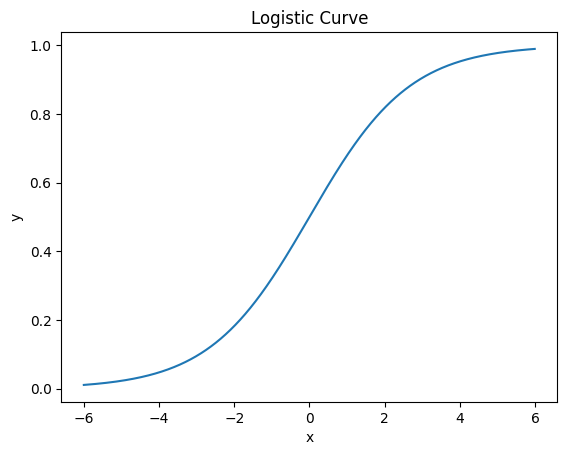

In [88]:
from matplotlib import pyplot as plt

#we need this line for matplotlib figures to show in jupyter
%matplotlib inline

import math

#This is only necessary because we will generate some example data
import random

#make a nice logistic curve, notice that we are sampling 1200 points, we need to divide our variable by 100
#to get proper results
example_data = [(1/(1+math.e**(-0.75*((i/100)-0)))) for i in range(-600,600)]

#since we sampled 1200 points, we need to divide by a factor of 100
x_data = [i/100 for i in range(-600,600)]

plt.plot(x_data, example_data)
plt.title('Logistic Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


## Fitting curves
Polyfit provides extremely easy curve fitting, but is not always useful when extrapolating results out over large ranges. Curve fit is a much better alternative when you want to fit a model function to data

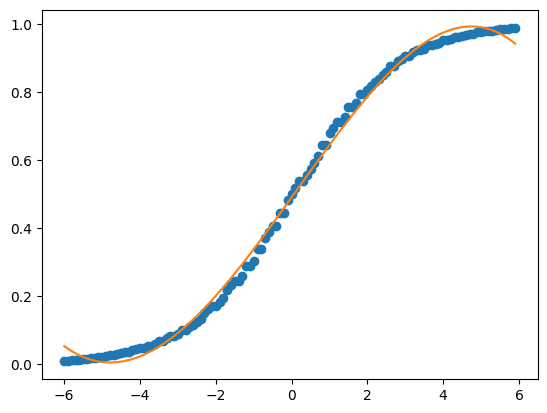

In [99]:
import math
import random
from matplotlib import pyplot as plt

#for polyfit
import numpy as np

#make our logistic curve again, but a little noisy
example_data = [(1/(1+math.e**(-0.75*((i/10 + (random.randrange(-1,1)/10) -0))))) for i in range(-60,60)]
x_data = [i/10 for i in range(-60,60)]

#fit our data with polyfit
fit = np.polyfit(x_data, example_data, deg=4)

#evalute our data
fit_y = np.polyval(fit, x_data)

plt.plot(x_data, example_data, 'o')
plt.plot(x_data,fit_y)
plt.show()


As you can see, the polyfit doesn't fit our function very well in this case. Let's try with curve fit.

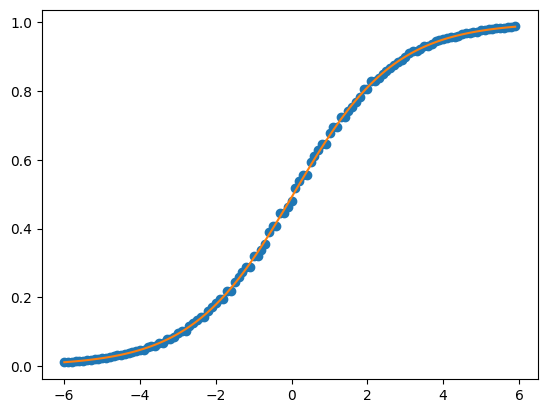

Parameters:
L: 1.0000826858586123, k: 0.745014686401161, x0: 0.046742266318528514


In [100]:
import math
import random
from matplotlib import pyplot as plt

#for curve fit
from scipy.optimize import curve_fit

#we have to define a function for scipy
def LogisticCurve(t, L, k, x0):
    return L/(1 + math.e**(-k*(t-x0)))

#make our logistic curve again, but a little noisy
example_data = [(1/(1+math.e**(-0.75*((i/10 + (random.randrange(-1,1)/10) -0))))) for i in range(-60,60)]
x_data = [i/10 for i in range(-60,60)]

#fitting our function. popt is parameters
popt, pcov = curve_fit(LogisticCurve, x_data, example_data)

plt.plot(x_data, example_data, 'o')
plt.plot(x_data, LogisticCurve(x_data, *popt))
plt.show()

print("Parameters:\nL: {0}, k: {1}, x0: {2}".format(*popt))

Clearly, this fits our data better.